# 1. 二元变量
## 1.1 伯努利分布(Bernoulli distribution)
考虑二元变量$x\in \lbrace0,1\rbrace$,描述了抛硬币事件中（正面为1，反面为0），其概率分布有参数$\mu$决定:
$$p(x=1)=\mu$$
$$p(x=0)=1-\mu$$

其中 $\mu$ : 抛到正面的概率.

这就是伯努利分布,其概率分布可以写成:
$$Bern(x\mid \mu)=\mu^x(1-\mu)^{(1-x)}$$
均值:$E[x]=\mu$ <br>
方差:$var[x]=\mu(1-\mu)$

## 1.2 伯努利分布下的最大似然估计
有一组$x$的观测数据$\mathcal D=\lbrace x_1,.....,x_N\rbrace$,在独立同分布的假设下,构造其关于$\mu$似然函数为:
$$p(\mathcal D\mid \mu)=\prod_{n=1}^Np(x_n\mid \mu)=\prod_{n=1}^N\mu^{x_n}(1-\mu)^{1-x_n}$$
可以通过最大似然的方法来估计$\mu$的值,上式的对数似然为:
$$\ln p(\mathcal D\mid \mu)=\sum_{n=1}^N\ln p(x_n\mid \mu)=\sum_{n=1}^N\lbrace x_n\ln \mu+(1-x_n)\ln (1-\mu)\rbrace$$
对 $\mu$ 最大化对数似然,可以得到:
$$\mu_{ML}=\frac{1}{N}\sum_{n=1}^Nx_n$$
即最大似然估计值为样本的均值.

若样本中 x=1 的数目为 m 则：
$$\mu_{ML}=\frac{M}{N}$$
考虑抛三次硬币出现了三次正面的情况，此时 N=m=3,μML=1。在这种情况下，最大似然估计会得到每次都是正面的结果，这显然违背了我们的正常认知。事实上，这是一种过拟合的典型表现。稍后通过引⼊µ的先验分布，我们会得到⼀个更合理的结论

## 1.3. 二项分布
给定数据总数 $ N$，$x=1$ 的总次数 $m$ 满足一定的分布，这个分布叫做二项分布（binomial distribution）,该分布如下:
$$Bin(m\mid N,\mu)=\mathcal C_N^m\mu^m(1-\mu)^{N-m}$$
其中: <br>
$\mathcal C_N^m=\frac{\mathcal P_N^m}{\mathcal P_m^m}$ : 为组合数,N中取m个的组合 
验证它是一个概率分布,
$$\sum_{m=0}^N\mathcal C_N^m\mu^m(1-\mu)^{N-m}=(\mu+1-\mu)^N=1$$
附二项式定理公式:
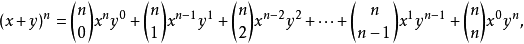
其均值为:
$$E[m]=N\mu$$
方差:
$$var[m]=N\mu(1-\mu)$$



## 1.4 beta分布
之前看到，当数据量较少时，最大似然的结果很可能会过拟合。为了减少这样的情况，从 Bayes 概率的观点出发，我们引入一个关于 $μ$ 的先验分布 $p(μ)$。

我们观察到似然函数是一系列 $μ^x(1−μ)^{1−x}$ 形式的乘积，如果我们选择一个正比于 $μ$ 的某个幂次和 $1−μ$ 的某个幂次的先验分布，那么对 $μ$ 来说，后验分布应当满足同样的形式。这样的性质叫做共轭性（conjugacy）。

在这里，我们引入的是 0−1 间的 beta 分布：
$$Beta(\mu \mid a,b)=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}$$
其中Gammma函数保证了Beta分布式归一化:
$$\Gamma(x)=\int_0^\infty\mu^{x-1}e^{-\mu}d\mu$$
关于Gamma函数的性质：
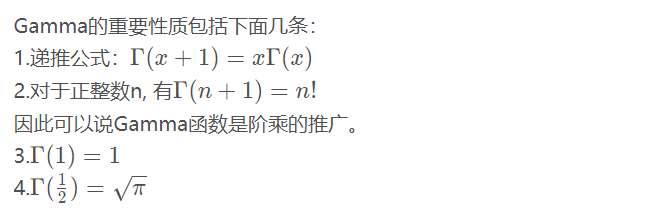
Beta分布的均值和方差为:
$$E[\mu]=\frac{a}{a+b}$$
$$var[\mu]=\frac{ab}{(a+b)^2(a+b+1)}$$
其中参数a和b常被称为超参数,他们控制了参数$\mu$的概率分布

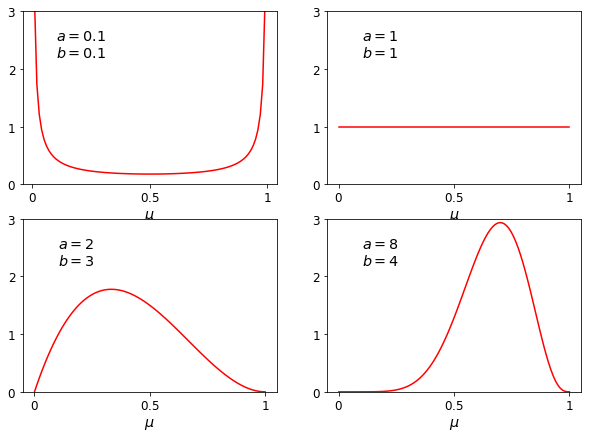

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

fig, axes = plt.subplots(2, 2,figsize=(10, 7))

axes = axes.flatten()

A = (0.1, 1, 2, 8)
B = (0.1, 1, 3, 4)

xx = np.linspace(0, 1, 100)

for a, b, ax in zip(A, B, axes):
    yy = beta.pdf(xx, a, b)
    ax.plot(xx, yy, 'r')
    ax.set_ylim(0, 3)
    
    ax.set_xticks([0, 0.5, 1])
    ax.set_xticklabels(["$0$", "$0.5$", "$1$"], fontsize="large")
    ax.set_yticks([0, 1, 2, 3])
    ax.set_yticklabels(["$0$", "$1$", "$2$", "$3$"], fontsize="large")
    ax.set_xlabel("$\mu$", fontsize="x-large")
    
    ax.text(0.1, 2.5, r"$a={}$".format(a), fontsize="x-large")
    ax.text(0.1, 2.2, r"$b={}$".format(b), fontsize="x-large")
plt.show()

有了先验分布,把$Beta$先验与⼆项似然函数$\mu^{m}(1-\mu)^{l}$相乘，然
后归⼀化。只保留依赖于$µ$的因⼦，我们看到后验概率分布的形式为那么后验分布为:
$$p(\mu\mid m,l,a,b)\propto \mu^{n+a+1}(1-\mu)^{l+b-1}$$
其中$l=N-m$表示硬币背面的次数
表示如下:
$$p(\mu\mid m,l,a,b)=\frac{\Gamma(m+a+l+b)}{\Gamma (m+a)\Gamma(l+b)}\mu^{m+b-1}(1-\mu)^{l+b-1}$$
至此，我们看到，如果我们观测到了一组 $m$ 个 $x=1$ 和 $l$ 个 $x=0$ 的数据，那么超参由 $a,b$ 变成 $a+m,b+l。$因此，超参 $a,b$ 可以看成是 $x=1$ 和 $x=0$ 的有效观测次数（注意：$a,b$ 可以不是整数）。
当有新的数据到来时，后验概率可以看成新的先验概率，因此这个过程可以序列化进行。

如果我们的目的是预测下一次实验的结果，那么我们有:
$$ p(x=1\mid\mathcal D) = \int_{0}^1 p(x=1\mid \mu) p(\mu\mid \mathcal D) d\mu=
 \int_0^1 \mu p(\mu\mid \mathcal D) = \mathbb E[\mu\mid \mathcal D]$$


而我们知道后验概率的分布，所以可以计算出其均值：
$$p(x=1|\mathcal D) = \frac{m+a}{m+a+l+b} = \frac{m+a}{N+a+b}$$


# 2. 多元变量

⼆元变量可以⽤来描述只能取两种可能值中的某⼀种这样的量。
现在我们考虑$1 of k$问题,即一个K维的状态向量$(x_1,.....,x_K)$ , 该向量符合$x_k=1,x_j=0,\forall j\neq k $,即$\sum_{k=1}^Kx_k=1$.

如: $x=(0,0,1,0,0,0)^T$表示K=6维状态的第三个状态.

设$x_k=1$的概率为$\mu_k$ , 则向量x的概率分布如下:
$$p(x\mid \mu)=\prod_{k=1}^K\mu_k^{x_k}$$
这可以看出是伯努利分布的一种形式.为了验证它是概率分布,有
$$\sum_x p(x\mid \mu)=\sum_{k=1}^K\mu_k=1$$
期望:
$$E[x\mid \mu]=\sum_x xp(x\mid \mu)=(\mu_1,........,\mu_K)^T=\mu$$
这里注意 $\mu$也是个向量。

## 2.1 最大似然估计

考虑多样本情况下的多状态向量.

有N个观测数据：$D=(x_1,.....,x_N)$,其似然函数
$$p(D\mid \mu)=\prod_{n=1}^N\prod_{k=1}^K\mu_k^{x_{nk}}=\prod_{k=1}^K\mu_k^{(\sum_nx_{nk})}=\prod_{k=1}^K\mu_k^{m_k}$$
其中:
$$m_k=\sum_n x_{nk}$$
我们看到似然函数对于N个数据点的依赖也是依赖于上式,它表示出现 $x_k=1$ 的次数，这些也是这个分布的充分统计量。

同样地,利用最大化对数似然法求得关于$\mu_k$最大似然下的值:
$$\mu_k^{ML}=\frac{m_k}{N}$$

可以看出,它是$N$次观测中,$x_k=1$所占的比例.

如果只考虑 $m_1,…,m_K，$,类似二项分布那么我们可以定义多项分布（multinomial distribution）：

其中: $m_k$表示出现 $xk=1$ 的次数，这些也是这个分布的充分统计量。

$$\text{Mult}(m_1, m_2,\dots,m_k|\mathbf\mu, N) = \begin{pmatrix} N \\ m_1m_2\dots m_k\end{pmatrix} \prod_{k=1}^K \mu_k^{m_k}$$

其中:
$$\begin{pmatrix} N \\ m_1m_2\dots m_k\end{pmatrix} \equiv \frac{N!}{m_1!m_2!\dotsm_K!}$$
$$N = \sum_{k=1}^K m_k$$

## 2.2 迪利克雷分布（Dirichlet distribution）

这里依然类似于二元分布,为改善过拟合问题,我们也希望给多元分布引入一个先验分布.考虑多元分布的形式,为了满足共轭性,先验分布应该满足这样的形式.
$$p(\mu\mid \alpha)\propto\prod_{k=1}^K\mu_k^{\alpha_{k-1}}$$

其中 $0 \leq \mu_k \leq 1, \sum_k \mu_k = 1$，$\mathbf\alpha=\left(\alpha_1,\dots,\alpha_K\right)^{\text T}$ 是先验分布的参数。

用Gamma函数归一化这个分布，我们便可以得到迪利克雷分布:
$$\text{Dir}(\mathbf{\mu|\alpha}) = \frac{\Gamma(\alpha_0)}{\Gamma(\alpha_1)\dots\Gamma(\alpha_K)} \prod_{k=1}^K\mu_k^{\alpha_k-1}$$
其中:
$$\alpha_0 = \sum_{k=1}^K \alpha_k$$
使用狄利克雷分布作为先验，后验分布为：
$$ p(\mathbf \mu|\mathcal D,\mathbf \alpha) 
 \propto p(\mathcal D|\mathbf \alpha) p(\mathbf{\mu|\alpha})
 \propto \prod_{k=1}^K \mu_k^{\alpha_k + m_k - 1}$$
 由共轭性，我们可以得到后验分布也是个狄利克雷分布：
 $$p(\mathbf \mu|\mathcal D,\mathbf \alpha)
 = \text{Dir}(\mathbf{\mu|\alpha+m})
 = \frac{\Gamma(\alpha_0+ N)}{\Gamma(\alpha_1+m_1)\dots\Gamma(\alpha_K+m_K)} \prod_{k=1}^K \mu_k^{\alpha_k+m_k-1}$$
 其中 $\mathbf m=\left(m_1,\dots,m_K\right)^{\text T}$。
  与二项分布类似，我们也可以将 $a_k$ 看成 $x_k=1$ 的一个有效观测次数。
 

# 3. 高斯分布
高斯分布，又叫正态分布，是连续变量经常使用的一个分布模型，

其实高斯分布是对原始坐标的变换，

一维的高斯分布如下：
$$\mathcal{N}\left(x\left|~\mu,\sigma^2\right.\right) = \frac{1}{(2\pi\sigma^2)^{1/2}} \exp\left\{-\frac{1}{2\sigma^2}(x-\mu)^2\right\}$$
其中 $\mu$ 是均值，$\sigma$ 是方差。
$D$-维的高斯分布如下：
$$\mathcal{N}\left(\mathbf x\left|~\mathbf{\mu, \Sigma}\right.\right) = \frac{1}{(2\pi)^{D/2}} \frac{1}{|\mathbf\Sigma|^{1/2}} \exp \left\{-\frac{1}{2}(\mathbf x - \mathbf \mu)^\top\mathbf\Sigma^{-1}(\mathbf x - \mathbf \mu)\right\}$$
其中，$D$ 维向量 $\mathbf \mu$ 是均值，$D\times D$ 矩阵 $\mathbf\Sigma$ 是方差，$|\mathbf\Sigma|$ 是其行列式。

在均值和方差固定时，高斯函数是熵最大的连续分布，因此高斯分布的应用十分广泛。

中心极限定理告诉我们，对于某个分布一组样本 $x_1, \dots, x_N$，他们的均值 $(x_1+\dots+x_N)/N$ 的分布会随着 $N$ 的增大而越来越接近一个高斯分布。



## 3.1 条件高斯分布

考虑 $D$ 维的高斯分布 $p(\mathbf x)= \cal N(\bf x~|~\bf{\mu,\Sigma})$，将其分成两组变量 ${\bf x}_a, {\bf x}_b$。不失一般性，我们假设 ${\bf x}_a$ 是 $\bf x$ 的前 $M$ 个分量，${\bf x}_b$ 是 $\bf x$ 的后 $D-M$ 个分量，即

$$ {\bf x} = \begin{pmatrix}
 {\bf x}_a \\
 {\bf x}_b
 \end{pmatrix}$$
 
 对应的均值和协方差矩阵可以写为：
  $$
 \begin{align}
 {\bf \mu} & = \begin{pmatrix}
 {\bf \mu}_a \\
 {\bf \mu}_b
 \end{pmatrix} \\
 {\bf \Sigma} & = \begin{pmatrix}
 {\bf \Sigma}_{aa} & {\bf \Sigma}_{ab} \\
 {\bf \Sigma}_{ba} & {\bf \Sigma}_{bb} 
 \end{pmatrix}
 \end{align}
 $$
 根据推到可以得到:
$$u_{a|b}=U_a+\Sigma_{ab}\Sigma_{bb}^{-1}(x_a-x_b)$$
$$\Sigma_{a|b}=\Sigma_{aa}-\Sigma_{ab}\Sigma_{bb}^{-1}\Sigma_{ba}$$

由 ${\bf\Sigma = \Sigma}^{\text T}$，我们可以知道 ${\bf \Sigma}_{aa}, {\bf \Sigma}_{bb}$ 是对称的，且 ${\bf \Sigma}_{ab}={\bf \Sigma}_{ba}^\top$。

为了方便，我们使用协方差的逆矩阵，或者叫精确度矩阵（precision matrix）：
$$
 {\bf \Lambda} = \begin{pmatrix}
 {\bf \Lambda}_{aa} & {\bf \Lambda}_{ab} \\
 {\bf \Lambda}_{ba} & {\bf \Lambda}_{bb} 
 \end{pmatrix}
 $$


## 3.2 边缘高斯分布
这里要求解的是下面的结果：
$$p(x_a)=\int p(x_a,x_b)dx_b$$
求解过程类似条件高斯分布,结果是:
$$p(x_a)=N(x_a\mid \mu_a,\Sigma_{aa})$$

## 3.3 高斯分布的贝叶斯定理

这部分假设已知⼀个⾼斯边缘分布$p(x)$和⼀个⾼斯条件分布$p(y|x)$，其中$p(y|x)$的均值是x的线性函数，协⽅差与$x$⽆关，现在希望求解边缘概率分布$p(y)$和条件概率分布$p(x|y)$。

 已知：
 
$$
 \begin{align}
 p(\mathbf x)&=\mathcal N(\mathbf x~|~\mathbf \mu, \mathbf \Lambda^{-1}) \\
 p(\mathbf y|\mathbf x)&=\mathcal N(\mathbf y~|~\mathbf{Ax+b}, \mathbf L^{-1}) \\
 \end{align}
$$
我们有 
$$
 \begin{align}
 p(\mathbf y)&=\mathcal N(\mathbf y~|~\mathbf{A\mu+b}, \mathbf L^{-1}+\mathbf A\mathbf \Lambda^{-1}\mathbf A^\top) \\
 p(\mathbf x|\mathbf y)&=\mathcal N(\mathbf y~|~\mathbf \Sigma\left\{ \mathbf A^\top \mathbf{L(y-b)} + \mathbf{\Lambda\mu} \right\}, \mathbf \Sigma) \\
 \end{align}
 $$


## 3.4 高斯分布最大似然

对于一组独立同分布的高斯观测数据 $\mathbf X=(x_1, \dots,x_N)^\text{T}$，

高斯分布的似然函数为：
$$
\ln p({\bf X\mid \mu,\Sigma}) = -\frac{ND}{2}\ln (2\pi)-\frac{N}{2}\ln|\mathbf\Sigma|-\frac{1}{2}\sum_{n=1}^N ({\bf x_n-\mu})^\top\mathbf\Sigma^{-1}({\bf x_n-\mu})
$$
然后对参数$\mu$进行求导计算,最后得到
$$\mu_{ML}=\frac{1}{N}\sum_{n=1}^Nx_n$$
再根据方差公式求协方差的最大似然:
$${\bf\Sigma}_{ML} = \frac{1}{N} \sum_{n=1}^N (\mathbf x_n-\mathbf \mu_{ML})(\mathbf x_n-\mathbf \mu_{ML})^\top$$
估计真实概率分布下的最大似然解的期望,可以得到以下结果:
$$E[\mu_{ML}]=\frac{1}{N}\sum_{n=1}^NE[x_n]=\mu$$
$$E[\Sigma_{ML}]=\frac{N-1}{N}\Sigma$$
其中:
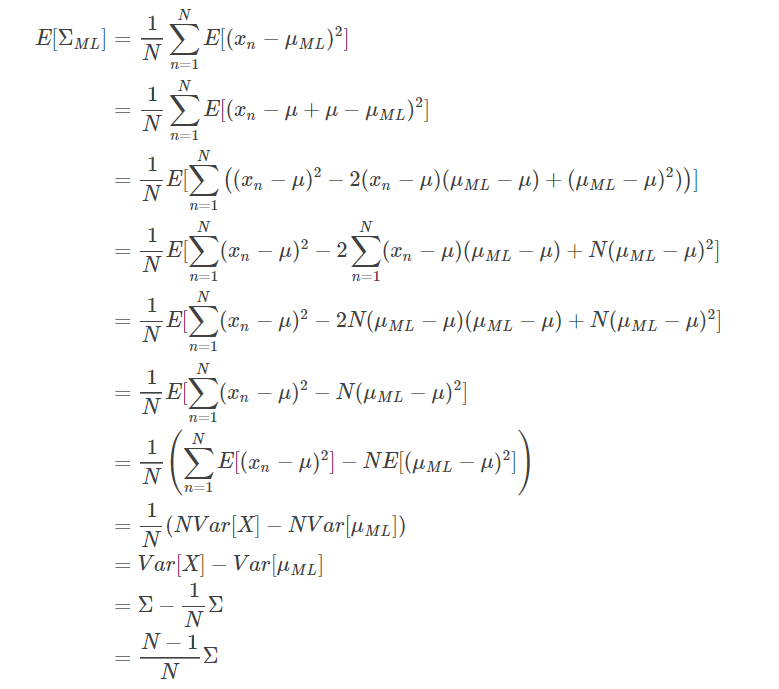
因此，我们的协方差估计是有偏的，为了调整这种情况，一般估计协方差用下面的公式纠正：
$$\tilde\Sigma=\frac{1}{N-1}\sum_{n=1}^N(x_n-\mu_{ML})(x_n-\mu_{ML})^T$$
这样推导出来的结果是无偏的，即
$$E[\tilde{\Sigma}]=\Sigma$$


# 3 序列估计
序列化方法要求我们每次只处理一个数据，然后扔掉这个数据。
这种方法在对于处理数据量很大（大到不能一次处理所有数据）的问题很重要。
考虑从 $N-1$ 个观测数据到 $N$ 个观测数据时，均值的最大似然估计的变化
$$
 \begin{align}
 \mu_{ML}^{(N)} & = \frac{1}{N} \sum_{n=1}^N \mathbf x_n \\
 & = \frac{1}{N} \mathbf x_N + \frac{1}{N} \sum_{n=1}^N-1 \mathbf x_n\\
 & = \frac{1}{N} \mathbf x_N + \frac{N-1}{N} \mu_{ML}^{(N-1)} \\
 & = \mu_{ML}^{(N-1)} + \frac{1}{N}(\mathbf x_N - \mu_{ML}^{(N-1)})
 \end{align} 
 $$
这相当于在原来的均值的基础上，增加了一个误差项 $\mathbf x_N - \mu_{ML}^{(N-1)}$ 的变化；同时随着 $N$ 的增大，误差项调整的权重逐渐变小。



# 4. 学生t分布
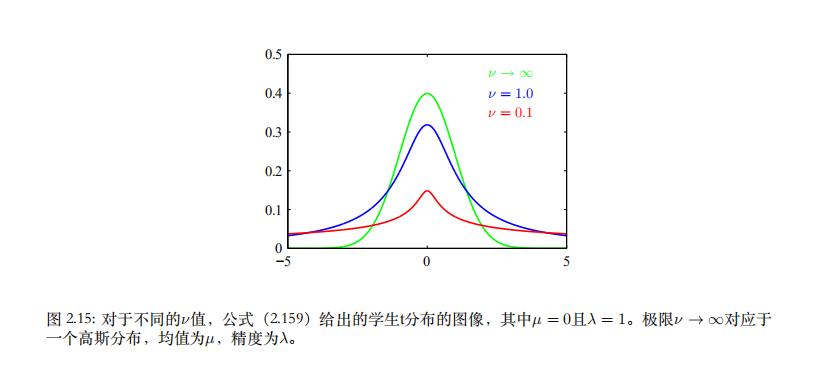
之前看到精确度的先验分布是一个 Gamma 分布。现在考虑一个单变量高斯分布 $\mathcal N(x|\mu,\tau^{-1})$ 和精确度的一个伽马分布先验 ${\rm Gam}(\tau|a,b)$，我们对精确度进行积分之后，得到 $x$ 的边缘分布为:
$$
 \begin{align}
 p(x|\mu, a,b) & = \int_{0}^{\infty} \mathcal N(x|\mu,\tau^{-1}) {\rm Gam}(\tau|a,b) d\tau \\
 & = \int_{0}^{\infty} 
 \frac{b^a e^{-b\tau} \tau^{a-1}}{\Gamma(a)} 
 \left(\frac{\tau}{2\pi}\right)^{1/2}
 \exp\left\{-\frac{\tau}{2}(x-\mu)^2\right\}
 d\tau\\
 & =
 \frac{b^a}{\Gamma(a)} \left(\frac{1}{2\pi}\right)^{1/2}
 \left[b+\frac{(x-\mu)^2}{2}\right]^{-a-1/2} \Gamma(a+1/2)
 \end{align}
 $$
 （关于 $\tau$ 可以凑成一个 ${\rm Gam}(a+1/2, b+\frac{(x-\mu)^2}{2})$ 的核）
 令参数 $\nu=2a, \lambda=a/b$，则得到学生t分布:
$$
 \text{St}(x|\mu,\lambda,\nu)= \frac{\Gamma(v/2+1/2)}{\Gamma(v/2)} \left(\frac{\lambda}{\pi\nu}\right)^{1/2}
\left[1+\frac{\lambda(x-\mu)^2}{\nu}\right]^{-\nu/2-1/2}
 $$
 其中，参数$ λ$ 叫做精确度，$μ $叫做自由度。
 当自由度为 1 时，学生 t 分布退化为柯西分布，当自由度趋于无穷时，学生 t 分布变成均值 $\lambda$ 精度 $\lambda$ 的高斯分布


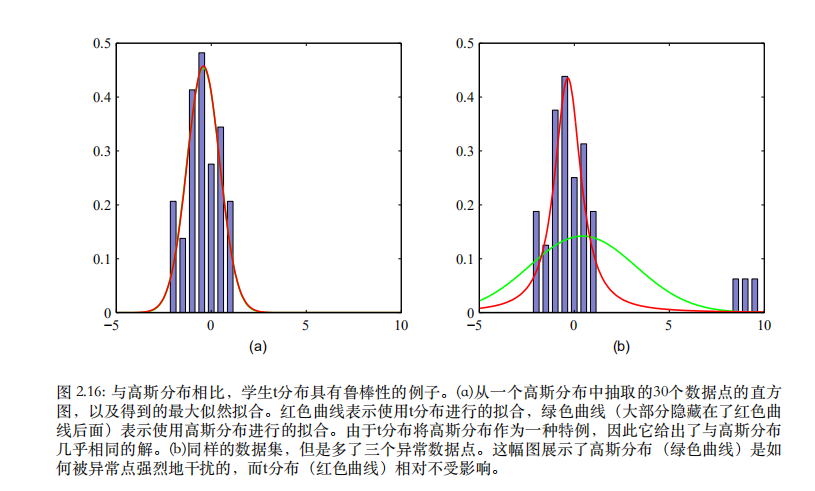

# 5. 周期变量和 von Mises 分布
高斯分布并不能很好的解决周期变量的问题。

对于周期变量，一种解决方法是使用极坐标系 $0\leq\theta<2\pi$ 的周期性，使用极坐标的角度 $\theta$ 表示周期变量。
## von Mises 分布
对于周期函数，我们考虑一个周期为 $2\pi$ 的概率分布 $p(\theta)$，它应当满足这三个条件：
 $$
 \begin{align}
 p(\theta) & \geq 0 \\
 \int_{0}^{2\pi} p(\theta) & =1 \\
 p(\theta+2\pi) &= p(\theta)
 \end{align}
 $$
 则对应的von-Mises分布（环形正态分布）为：
 $$
 p(\theta|\theta_0,m) = \frac{1}{2\pi I_0(m)}\exp\{m\cos(\theta-\theta_0)\}
 $$
 这里 $\theta_0$ 是分布的均值，$m$ 类似于高斯分布中的精确度。
 $I_0(m)$ 是用来归一化概率分布的常数
  $$
 I_0(m) =\frac{1}{2\pi} \int_{0}^{2\pi} \exp\{m\cos\theta\} d\theta
 $$
 
 现在考虑 `von Mises` 分布的最大似然：
 
 $$
 \ln p(\mathcal D|\theta_0,m) = -N\ln(2\pi)-N\ln I_0(m) + m\sum_{n=1}^N \cos(\theta_n-\theta_0) 
 $$
 
 令其对 $\theta_0$ 的偏导为 0，我们有
 
 $$
 \sum_{n=1}^N \sin(\theta_n-\theta_0) = \cos\theta_0 \sum_{n=1}^N \sin\theta_n - \sin\theta_0 \sum_{n=1}^N \cos\theta_n = 0
 $$

 从而 
 $$
 \theta_{ML} = \tan^{-1} \left\{\frac{\sum_{n} \sin \theta_n}{\sum_{n} \cos \theta_n}\right\}
 $$
 
类似地，考虑对 $m$ 的偏导，利用 $I_0'(m) = I_1(m)$（$I_1$ 是修正的 1 阶 Bessel 函数），我们有：
$$
\frac{I_1(m)}{I_0(m)} = \frac{1}{N} \sum_{n=1}^N \cos(\theta_n-\theta_0) 
$$
令
$$
A(m) = \frac{I_1(m)}{I_0(m)}
$$
则有
$$
A(m_{ML}) = \frac{1}{N} \cos\theta_0^{ML} \sum_{n=1}^N \cos\theta_n - \frac{1}{N} \sin\theta_0^{ML} \sum_{n=1}^N \sin\theta_n 
$$
有了$A_{ML}$,如下图,便可就出$m_{ML}$
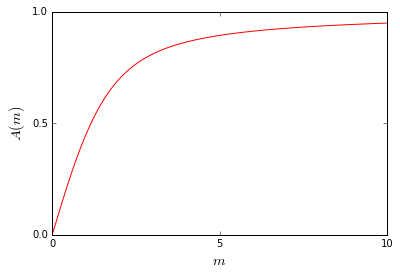

# 混合高斯分布
高斯分布是一个单峰模型，对于多峰情况的模拟效果并不好。

考虑多个高斯分布的结合可以解决。

看下图:
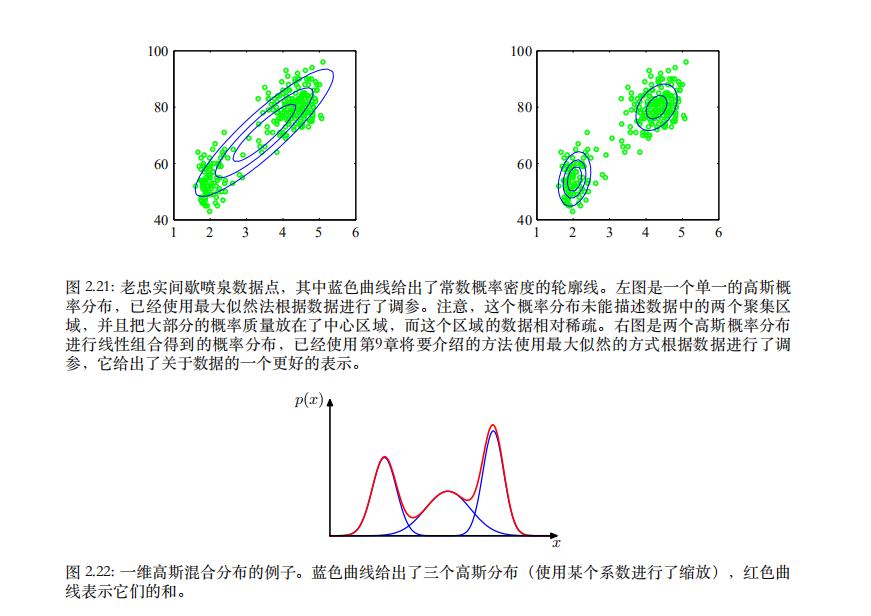


于是考虑K个⾼斯概率密度的叠加，即高斯混合分布（`mixture of Gaussians`）形式为:
$$
p(\mathbf x) = \sum_{k=1}^K \pi_k \mathcal N(\mathbf x|\mathbf \mu_k, \mathbf \Sigma_k) 
$$

其中 $\mathcal N(\mathbf x|\mathbf \mu_k, \mathbf \Sigma_k)$ 是一个高斯分布，是混合分布的一个组分（`component of the mixture`）。

考虑概率分布的归一性 $\int p(\mathbf x) d\mathbf x = 1$：
$$\sum_{k=1}^K \pi_k = 1$$
同时考虑非负性 $p(\mathbf x) \geq 0$：
$$\forall k, \pi_k \geq 0$$
于是有：
$$0 \leq \pi_k \leq 1$$

另一方面，我们有：
$$p(\mathbf x) = \sum_{k=1}^N p(k) p(\mathbf x|k)$$
从而我们可以认为 $\pi_k = p(k)$ 是第 $k$ 个组分的先验分布，$p(\mathbf x|k)$ 是给定 $k$ 下的条件分布。
可以计算 $k$ 的后验分布：
 $$
 \begin{align}
 \gamma_k(\mathbf x) & = p(k|\mathbf x) \\
 & = \frac{p(k) p(\mathbf x|k)}{\sum_{k=1}^N p(k) p(\mathbf x|k)} \\
 & = \frac{\pi_k \mathcal N(\mathbf x|\mathbf \mu_k, \mathbf \Sigma_k) }{\sum_{k=1}^K \pi_k \mathcal N(\mathbf x|\mathbf \mu_k, \mathbf \Sigma_k) }
 \end{align}
 $$
 其参数为 $\bf \pi, \mu, \Sigma$，其中 $\mathbf \pi = {\pi_1, \dots, \pi_n}, \mathbf \mu = \{\mathbf\mu_1,\dots,\mathbf\mu_n\}, \mathbf\Sigma=\{\mathbf\Sigma_1,\dots,\mathbf\Sigma_n\}$。

# 6. 指数族分布


之前我们看到的很多分布函数，除了混合高斯分布之外，都可以归为一类，即指数族分布（`exponential family`）。

一般来说，对于随机变量 $\mathbf x$，参数 $\mathbf \eta$，指数族分布具有如下的形式：
$$ \mathbf p(\mathbf x|\mathbf \eta)=h(\mathbf x)g(\mathbf \eta)\exp\left\{\mathbf{\eta^\top u(x)}\right\} $$

随机变量 $\mathbf x$ 可以是向量或者标量，可以是离散的也可以是连续的。

$\mathbf \eta$ 叫做分布的自然（特性）参数（`natural parameter`），$\bf u(x)$ 是 $\bf x$ 的一个函数。

$g(\mathbf \eta)$ 可以看出是一个归一化参数，保证概率分布是归一化的，连续情况下有：
$$ g(\mathbf \eta)\int h(\mathbf x)\exp\left\{\mathbf{\eta^\top} \mathbf{u(x)}\right\} d\mathbf x=1
$$

这个就是指数族分布的通用形式，下面将各种分布用这个通用形式写出来
## 6.1 伯努利分布
伯努利分布为：
$$ p(x|\mu) = {\rm Bern} = \mu^x(1-\mu)^{1-x} $$

对应的参数分别为：

$$
\begin{align}
u(x) &= x\\
h(x) &= 1\\
g(\eta) &= \sigma(-\eta)
\end{align}
$$
其中:
$$\sigma(\eta) = \frac{1}{1+\exp(-\eta)}$$


## 6.2 多项式分布
多项式分布:
$$ p(\mathbf x|\mathbf \mu) = \sum_{k=1}^M \mu_k^{x_k} = \exp\left\{\sum_{k=1}^M x_k\ln\mu_k\right\} $$
其中 $\mathbf x = (x_1,\dots,x_M)^\top$。
其中参数:
$$\mu(x)=x$$
$$h(x)=1$$
$$g(η)=(1+\sum_{k=1}^{M-1}\exp(η_k))^{-1}$$

## 6.3 高斯分布

一维高斯分布:

$$
 p(x|\mu,\sigma^2)
 = \frac{1}{(2\pi\sigma^2)^{1/2}} \exp\left\{-\frac{1}{2\sigma^2}(x-\mu)^2\right\}
 = \frac{1}{(2\pi\sigma^2)^{1/2}} \exp\left\{-\frac{1}{2\sigma^2}x^2+\frac{\mu}{2\sigma^2}x-\frac{1}{2\sigma^2}\mu^2\right\}
 $$
 对应的参数分别为：
 
 $$
 \begin{align}
 \mathbf \eta & = \begin{pmatrix}\mu/\sigma^2 \\ -1/2\sigma^2\end{pmatrix} \\
 \mathbf u(x) &= \begin{pmatrix}x \\ x^2\end{pmatrix}\\
 h(\mathbf x) &= (2\pi)^{-1/2}\\
 g(\mathbf \eta) &= (-2\eta_2)^{1/2} \exp\left(\frac{\eta_1^2}{4\eta_2}\right)
 \end{align}
 $$

# 6.4 最大似然
 下式两边对 $\bf \eta$ 求梯度：
 
 $$
 g(\mathbf \eta)\int h(\mathbf x)\exp\left\{\mathbf{\eta^\top} \mathbf{u(x)}\right\} d\mathbf x=1
 $$
 
 有
 
 $$
 \triangledown g(\mathbf\eta)\int h(\mathbf x)\exp\left\{\mathbf{\eta^\top} \mathbf{u(x)}\right\} d\mathbf x + g(\mathbf \eta)\int h(\mathbf x)\exp\left\{\mathbf{\eta^\top} \mathbf{u(x)}\right\} \mathbf{u(x)}d\mathbf x= 0
 $$
 
 结合原来的等式，我们有：
 
 $$
 -\frac{1}{g(\mathbf\eta)}\triangledown g(\mathbf\eta) = g(\mathbf \eta)\int h(\mathbf x)\exp\left\{\mathbf{\eta^\top} \mathbf{u(x)}\right\} u(\mathbf x)d\mathbf x = \mathbb E[\mathbf{u(x)}]
 $$
 
 从而
 
 $$
  \triangledown \ln g(\mathbf\eta) = \mathbb E[\mathbf{u(x)}]
 $$
 
 再对 $\bf \eta$ 求一次梯度有：
 
 $$
 \begin{align}
  \triangledown \triangledown \ln g(\mathbf\eta) = & 
 g(\mathbf \eta)\int h(\mathbf x)\exp\left\{\mathbf{\eta^\top} \mathbf{u(x)} \right\} u(\mathbf x)u(\mathbf x)^\top d\mathbf x \\ & + \triangledown g(\mathbf \eta)\int h(\mathbf x)\exp\left\{\mathbf{\eta^\top} \mathbf{u(x)}\right\} \mathbf{u(x)} d\mathbf x\\
 = & \mathbb E[\mathbf{u(x)u(x)^\top}] - \mathbb E[\mathbf{u(x)}]\mathbb E[\mathbf{u(x)}^\top] \\
 = & \mathrm{cov}[\mathbf{u(x)}]
 \end{align}
 $$
 
 这样我们就得到了它的协方差矩阵。
 
 有了这个结论，我们考虑它的最大似然估计，设数据点为 $\mathbf X=\{\mathbf x_1, \dots ,\mathbf x_n\}$，
 
 
 似然函数为：
 
 $$
 p({\bf X|\eta}) = \left(\prod_{n=1}^N h(\mathbf x_n)\right) g(\mathbf \eta)^N \exp\left\{\mathbf{\eta}^\top\sum_{n=1}^N \mathbf{u}(\mathbf{x}_n)\right\}
 $$
 
 对数似然函数为：
 
 $$
 \ln p({\bf X|\eta}) = \sum_{n=1}^N \ln h(\mathbf x_n) + N \ln g(\mathbf \eta) + \mathbf{\eta}^\top\sum_{n=1}^N \mathbf{u}(\mathbf{x}_n)
 $$
 
 考虑对 $\bf \eta$ 的梯度，并将其设为 0，有
 
 $$
  \triangledown \ln g(\mathbf\eta_{ML}) = \frac{1}{N} \sum_{n=1}^N \mathbf{u}(\mathbf{x}_n)
 $$
 
 当 $N\to\infty$，它就是均值 $ \mathbb E[\mathbf{u(x)}]$。
 
 我们看到，对于参数 $\mathbf \eta$ 的估计只依赖于 $\sum_{n} \mathbf{u}(\mathbf{x}_n)$，从而 $\sum_{n} \mathbf{u}(\mathbf{x}_n)$ 是它的一个充分统计量（`sufficient statistic`）。这意味着我们只需要存储这个充分统计量即可。
 
 例如伯努利分布（$u(x)=x$）的充分统计量是 $\sum_{n} x_n$，高斯分布（$\mathbf u(x)=\begin{bmatrix} x \\ x^2\end{bmatrix}$）的充分统计量为 $\begin{bmatrix} \sum_{n} x_n \\ \sum_{n} x_n^2\end{bmatrix}$。

## 6.5 共轭先验
 对于指数族分布，考虑似然函数的形式，我们可以使用如下的共轭先验分布：
 
 $$
 p(\mathbf\eta|\mathbf\chi,\nu)=f(\mathbf\chi,\nu)g(\mathbf\eta)^{\nu} \exp\left\{\nu\mathbf{\eta^\top \chi}\right\}
 $$
 
 其中 $\mathbf{\chi}$ 是一个向量，$\nu$ 是一个标量。
 
 这样后验分布就是：
 
 $$
 p(\mathbf\eta|\mathbf{X, \chi},\nu) \propto g(\mathbf\eta)^{\nu + N} \exp\left\{\nu\mathbf{\eta^\top \left(\chi+\sum_{n=1}^N \mathbf u(\mathbf x_n)\right)}\right\}
 $$
 
 参数 $\nu$ 可以认为是先验的观测样本数，$\bf \chi$ 可以认为是先验的充分统计量。
 
 ## 6.6 无信息先验
 在许多情形下，我们可能对分布应该具有的形式⼏乎完全不知道。这时，我们可以寻找⼀种形式的先验分布，被称为⽆信息先验。这种先验分布的⽬的是尽量对后验分布产⽣尽可能⼩的影响。

这种方法会存在两个困难：

（1）对于参数是连续变量的情况，参数的取值范围可能是无界的，那么先验分布无法被正确归一化

（2）概率分布中存在非线性变量的概率密度的变换，会导致概率密度无法归一化

### 6.6.1 直方图拟合分布

这种方法把变量$x$划分成不同的宽度为$△i$的箱⼦，然后对落在第ii个箱⼦中的$x$的观测数量$n_i$进⾏计数。为了把这种计数转换成归⼀化的概率密度，我们简单地把观测数量除以观测的总数$N$，再除以箱⼦的宽度$△i$，得到每个箱⼦的概率的值
$$p_i=\frac{n_i}{N△i}$$

优点：⼀旦直⽅图被计算出来，数据本⾝就被丢弃了，这当数据量很⼤的时候会很有优势。并且，直⽅图⽅法也很容易应⽤到数据顺序到达的情形。

缺点：受到所选$bin$的大小的影响。当$△$⾮常⼩的时候，最终的概率密度模型有很多尖刺，有很多结构没有出现在⽣成数据的概率分布中。相反，如果$△$过⼤，那么最终的概率模型会过于平滑，结果⽆法描述细节；往往只能模拟离散数据
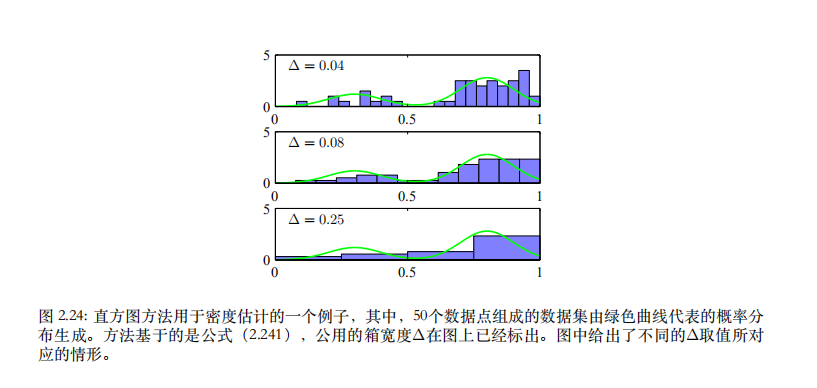







### 6.6.2 核密度估计
 考虑估计 $D$ 维空间的一个未知概率分布 $p(\mathbf x)$ 的问题，我们考虑 $\bf x$ 附近包含它的一个小区域 $\mathcal R$，这个小区域内的概率质量为：
 
 $$
 P=\int_{\mathcal R} p(\mathbf x) d\mathbf x
 $$
 
 假设现在我们有 $N$ 个观测点；对于这 N 个点来说，它有 $P$ 的概率落在区域 $\mathbf R$ 中，所以有 $K$ 个数据点落在 $\mathbf R$ 中的概率是一个二项分布，概率为
 
 $$
 \mathrm{Bin}(K| N, P)=\frac{N!}{K!(N-K)!}P^{K}(1-P)^{N-K}
 $$
 
 利用二项分布的性质，我们知道
 $\mathbb E[K/N] = P$
 和
 $\mathrm{var}[K/N]=P(1-P)/N$，当 $N$ 足够大时，我们有：
 
 $$K\simeq NP$$
 
 当区域 $\mathcal R$ 足够小时，我们有：
 
 $$P\simeq p(\mathbf x)V$$
 
 其中 $V$ 是区域的体积，这样我们就得到估计值：
 
 $$
 p(\mathbf x) = \frac{K}{NV}
 $$
 
 对于 $\mathcal R$ 的选择，我们要让它足够小，从而 $p(\mathbf x)$ 可以认为是一个常数；但是要足够大，使得落在这个区域的次数 $K$ 能在均值附近出现峰值。
 
 当我们固定 $K$，然后决定适合的 $V$ 时，对应的是 $K$ 近邻的方法，当我们固定 $V$ 找 $K$ 的时候，对应的是核方法。
 
 当 $N\to\infty$ 的时候，这两种方法在 $V, K$ 随 $N$ 增大而分别减小和增大的情况下都会收敛到真实分布。
#### 核函数方法
 我们将区域 $\mathcal R$ 限制为以 $\bf x$ 为中心的一个小立方体。为了计算落在这个区域的数据点数 $K$ 我们定义这样的函数：
 
 $$
 k(\mathbf u) = \left\{
 \begin{aligned}
 1, &~|u_i| \leq 1/2, i=1,\dots,D \\
 0, &~{\rm otherwise}
 \end{aligned}
 \right.
 $$
 
 它表示数据点是否落在以原点为中心的单位立方体。
 
 $k(\mathbf u)$ 就是一个核函数的例子，在这个问题上，更确切的说法应该是 Parzen 窗函数。
 
 从上面的式子可以看出落在，$k(\frac{\mathbf{x-x}_n}{h})$ 表示数据点 ${\bf x}_n$ 是否以 $\mathbf x$ 为中心，边长为 $h$ 的区域。因此，落在这个区域的数据点总数为：
 
 $$
 K = \sum_{n=1}^N k(\frac{\mathbf{x-x}_n}{h})
 $$
 
 从而概率密度的估计值为
 
 $$
 p({\bf x})=\frac{1}{N} \sum_{n=1}^N \frac{1}{h^D} k(\frac{\mathbf{x-x}_n}{h})
 $$
 
 与直方图法一样，这种方法面临的一个问题是在边界上的不连续性。我们可以考虑一个更加光滑的核函数，比如说最常见的高斯核函数，考虑上式的形式，我们给出一个类似的表达式：
 
 $$
 p({\bf x})=\frac{1}{N} \sum_{n=1}^N \frac{1}{(2\pi h^2)^{1/2}} \exp(-\frac{\|\mathbf{x-x}_n\|}{2h^2})
 $$
 
 这里 $h$ 对应的是高斯成分的标准差。
 
 当我们更换了核函数的时候，为了保证概率密度是归一的，求和的部分通常也要满足概率密度的归一性。
 
 通常，核函数满足的条件为
 
 $$
 \begin{align}
 k(\mathbf u) & \geq 0 \\
 \int k(\mathbf u)d\mathbf u & = 1
 \end{align}
 $$
 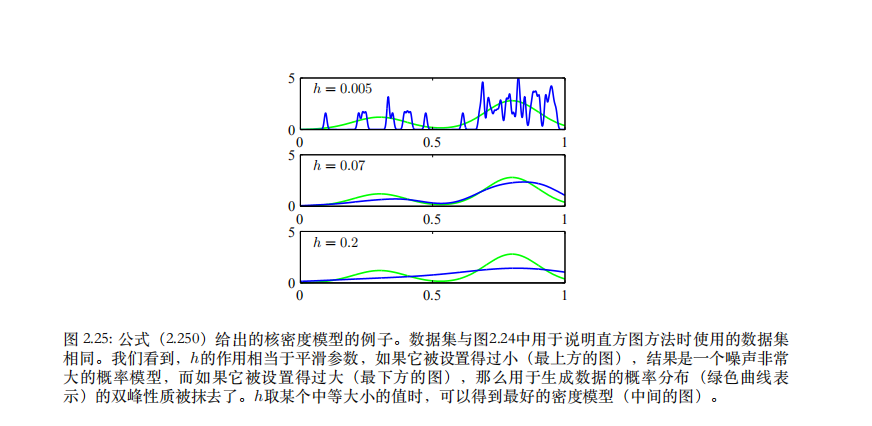

### 6.6.3 近邻方法
 在核方法中，一旦我们选定了 $h$，我们就相当于固定了体积 $V$（分别对应于上一节的 $h^D, (2\pi h^2)^{1/2}$）。
 
 现在我们考虑固定 $K$ 的情况，此时我们需要找到一个合适的 $V$ 使得落在体积 $V$ 中的点正好为 $K$ 个。
 
 为了方便，我们考虑点 $\bf x$ 的一个球域，这个球域正好包含 $K$ 个数据点。此时，球的体积由离 $\bf x$ 第 $K$ 近的点决定。
 
 该点的密度近似为：
 
 $$
 p(\mathbf x)=\frac{K}{NV}
 $$
 
 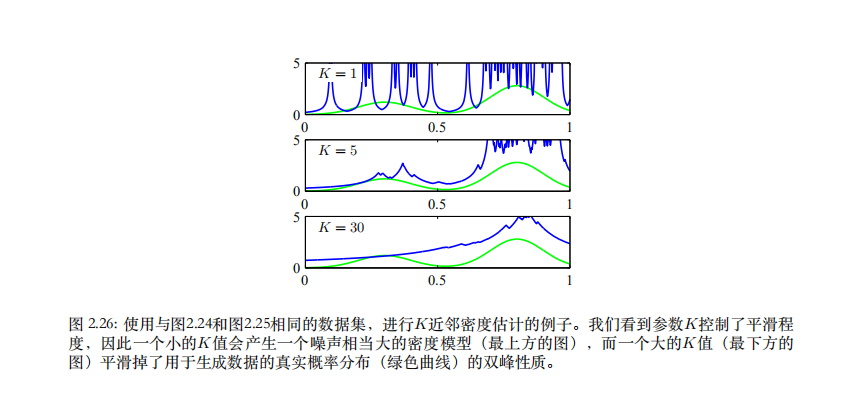